In [1]:
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [17]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
df0 = df[0:50]   # setosa
df1 = df[50:100] # versicolor
df2 = df[100:150] # verginica

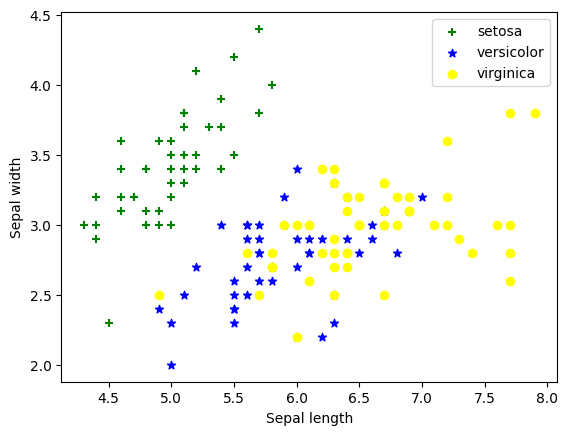

In [32]:
import matplotlib.pyplot as plt
# sepal length and sepal width
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], label = "setosa", color = "green", marker = "+")
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], label = "versicolor", color = "blue", marker = "*")
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], label = "virginica", color = "yellow")
plt.legend()

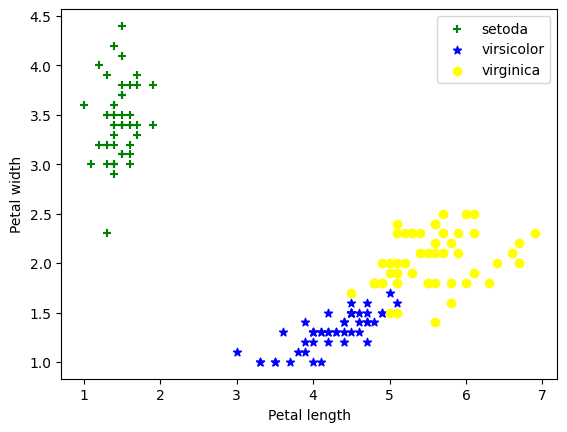

In [34]:
# petal length and petal width
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.scatter(df0['petal length (cm)'], df0['sepal width (cm)'], label = "setoda", color = "green", marker = "+")
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], label = "virsicolor", color = "blue", marker = "*")
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], label = "virginica", color = "yellow")
plt.legend()

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2)

# Building the KNN classifier

In [37]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=10)   # n_neighnors is k
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8666666666666667

In [38]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 7,  0,  0],
       [ 0,  9,  0],
       [ 0,  4, 10]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

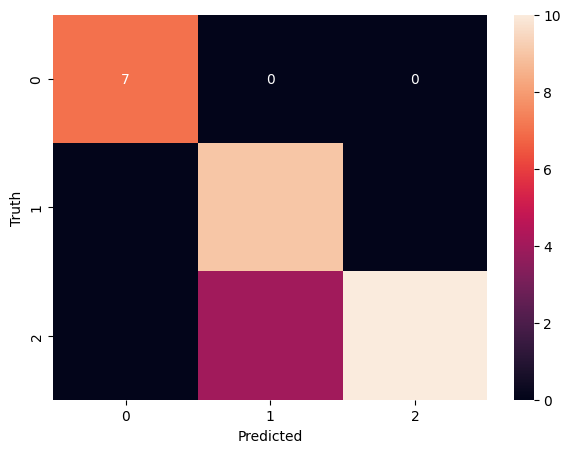

In [40]:
# same grid with seaborn
import seaborn as sn
plt.figure(figsize = (7,5))
sn.heatmap(cm, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.69      1.00      0.82         9
           2       1.00      0.71      0.83        14

    accuracy                           0.87        30
   macro avg       0.90      0.90      0.88        30
weighted avg       0.91      0.87      0.87        30

